In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,8]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
provider = pd.read_csv('/content/drive/MyDrive/Train-1542865627584.csv')
print(provider.shape)
provider.head()

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
benificary = pd.read_csv('/content/drive/MyDrive/Train_Beneficiarydata-1542865627584.csv')
print(benificary.shape)
benificary.head()

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
inpatient= pd.read_csv('/content/drive/MyDrive/Train_Inpatientdata-1542865627584.csv')
print(inpatient.shape)
inpatient.head()

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
outpatient= pd.read_csv('/content/drive/MyDrive/Train_Outpatientdata-1542865627584.csv')
print(outpatient.shape)
outpatient.head()

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


#### We can see outpatient data is more compared to inpatient

In [ ]:
provider.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [ ]:
provider['Provider'].value_counts().unique() ### All providers are unique

array([1])

In [ ]:
benificary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [ ]:
inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [ ]:
outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [ ]:
outpatient.ClmDiagnosisCode_1.unique()

array(['78943', '6115', '2723', ..., '37800', '80160', '64821'],
      dtype=object)

### Merging the inpatient and outpatient data and outer merge to get all the benificarie's details

In [ ]:
Allpatient = pd.merge(inpatient,outpatient,
                      
left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
'ClmAdmitDiagnosisCode'],
                      
right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
'ClmAdmitDiagnosisCode']
                      
,how='outer')

print(Allpatient.shape)
Allpatient.head()

(558211, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


### Merging all patient data with the benificary data on BeneID

In [ ]:
allpatient_benificary = pd.merge(Allpatient,benificary,on='BeneID')

print(allpatient_benificary.shape)
allpatient_benificary.head()

(558211, 54)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,...,1,1,2,2,1,1,5000,1068,250,320


### Merging the allpatient_benificary data with the provider details to get the full train data

In [ ]:
final_train = pd.merge(provider,allpatient_benificary,on='Provider')

print(final_train.shape)
final_train.head()

(558211, 55)


,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,...,1,1,1,2,2,2,2020,1068,6700,2700
1,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1,1,1,2,2,1,36000,1068,3520,140
2,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,2,2,2,2,2,2,95000,2136,2270,900
3,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70,PHY402512,NaN,NaN,...,2,2,1,1,2,2,5000,1068,370,70
4,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,1,1,1,2,1,2,3000,1068,0,0


In [ ]:
final_train.shape

(558211, 55)

# EDA

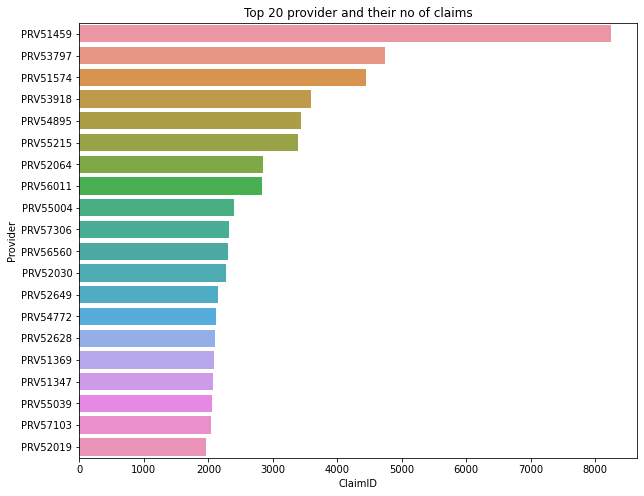

In [ ]:
### Each provider wise no of claims

plt.figure(figsize=(10,8))

df= pd.DataFrame(final_train.groupby(['Provider'])['ClaimID'].nunique()).reset_index()
df = df.sort_values('ClaimID',ascending=False).head(20)

sns.barplot(df['ClaimID'],df['Provider'])
plt.title('Top 20 provider and their no of claims')
plt.show()

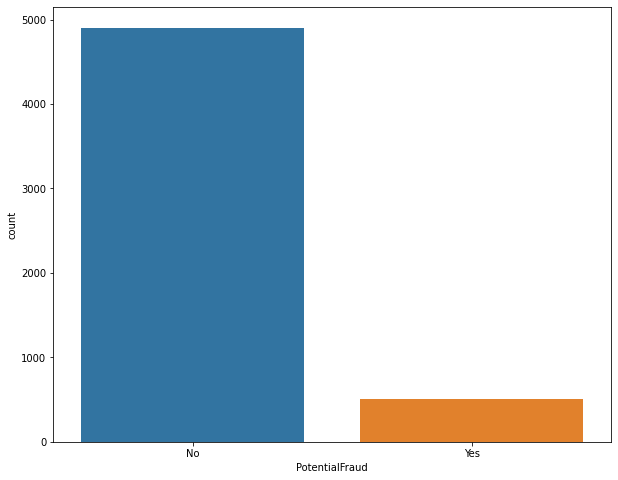

In [ ]:
## No of Fraud & non Fraud in the provider data
plt.figure(figsize=(10,8))
sns.countplot(provider['PotentialFraud'])
plt.show()

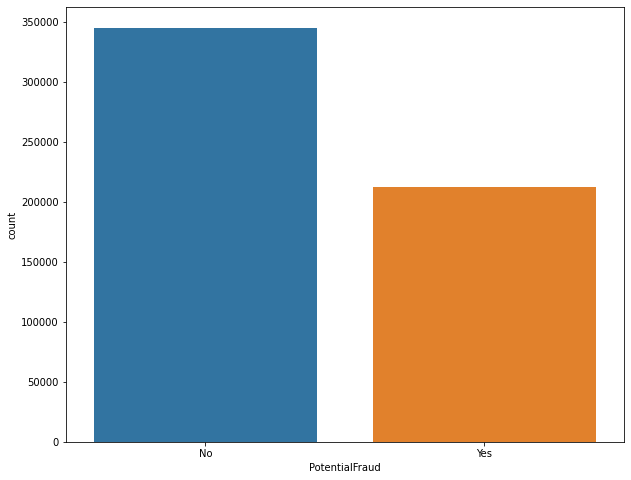

In [ ]:
## No of Fraud & non Fraud in the provider + Benificary Data + Patient Data (final data)
plt.figure(figsize=(10,8))
sns.countplot(final_train['PotentialFraud'])
plt.show()

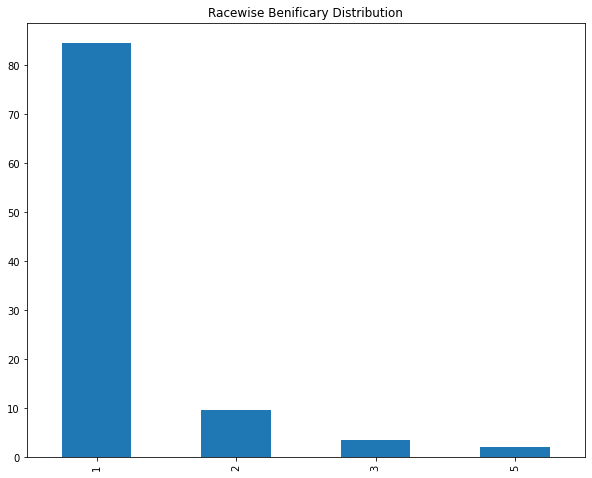

In [ ]:

## Race-wise benificary distribution
plt.figure(figsize=(10,8))
(benificary['Race'].value_counts()/len(benificary)*100).plot(kind='bar')
plt.title('Racewise Benificary Distribution')
plt.show()

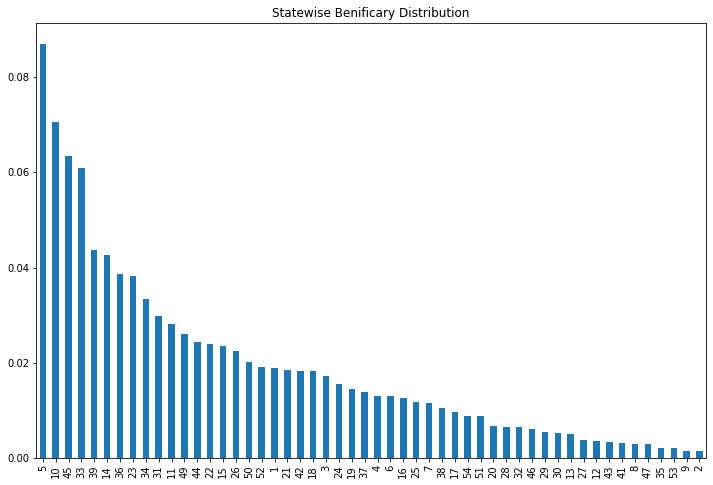

In [ ]:
## State-wise benificary distribution
plt.figure(figsize=(12,8))
(benificary['State'].value_counts()/len(benificary)).plot(kind='bar')
plt.title('Statewise Benificary Distribution')
plt.show()

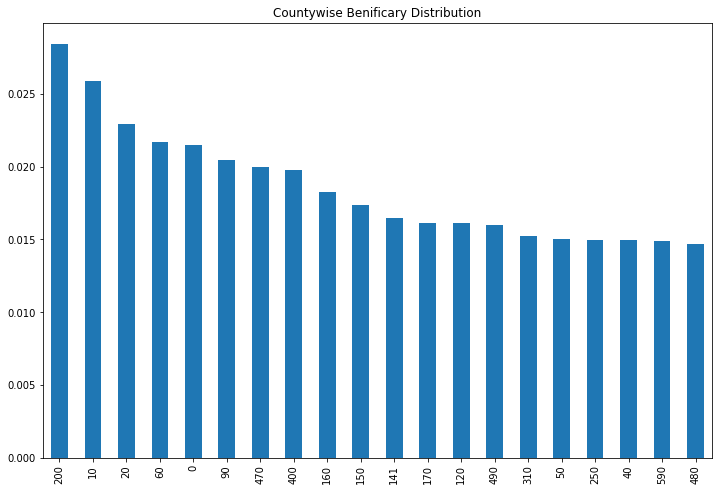

In [ ]:
## County wise benificary distribution
plt.figure(figsize=(12,8))
(benificary['County'].value_counts()/len(benificary)).head(20).plot(kind='bar')
plt.title('Countywise Benificary Distribution')
plt.show()

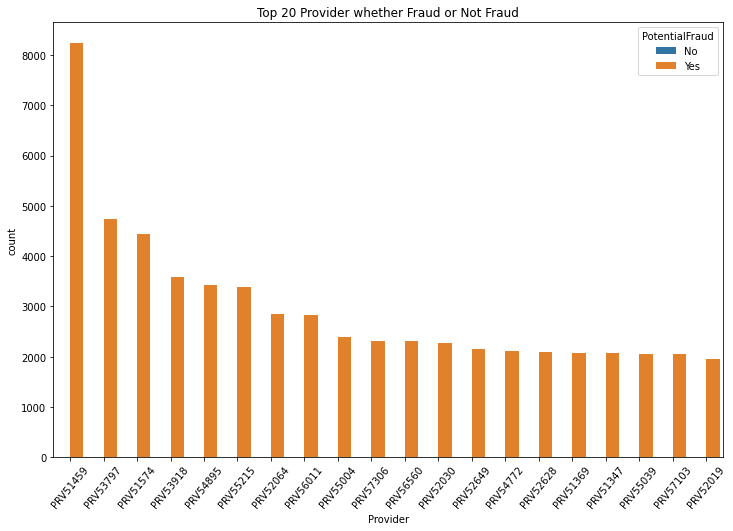

In [ ]:
## Top 50 provider and whether they are fraud or not


plt.figure(figsize=(12,8))
sns.countplot(x='Provider',hue='PotentialFraud',data=final_train,
              order=final_train['Provider'].value_counts().head(20).index)


plt.xticks(rotation=50)
plt.title('Top 20 Provider whether Fraud or Not Fraud')
plt.show()

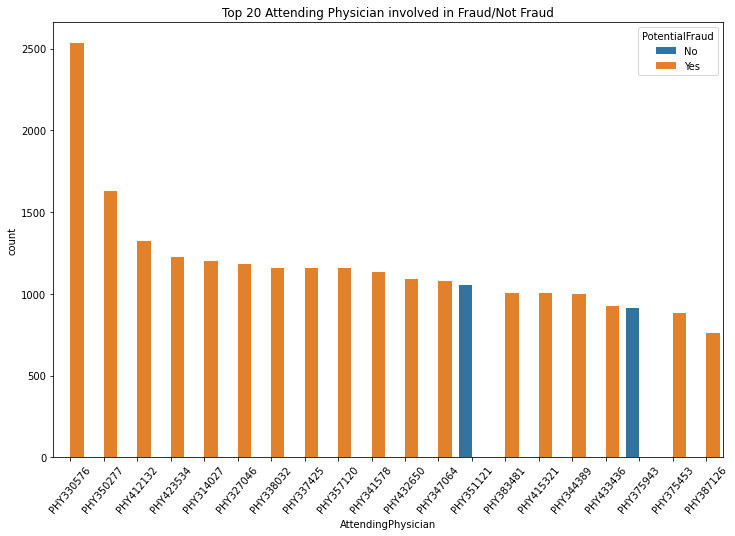

In [ ]:

## Top 20 attaending physician, operating physician, other physician
plt.figure(figsize=(12,8))
sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=final_train,
              order=final_train['AttendingPhysician'].value_counts().head(20).index)

plt.xticks(rotation=50)
plt.title('Top 20 Attending Physician involved in Fraud/Not Fraud')
plt.show()

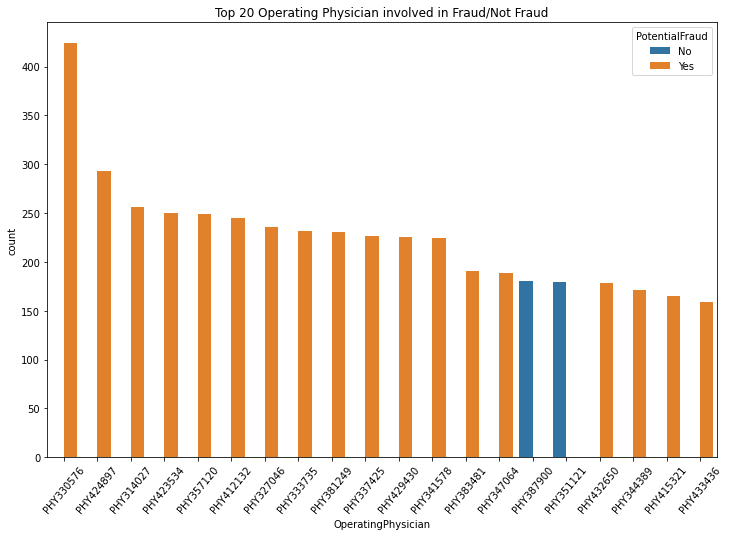

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='OperatingPhysician',hue='PotentialFraud',data=final_train,
              order=final_train['OperatingPhysician'].value_counts().head(20).index)

plt.xticks(rotation=50)
plt.title('Top 20 Operating Physician involved in Fraud/Not Fraud')
plt.show()

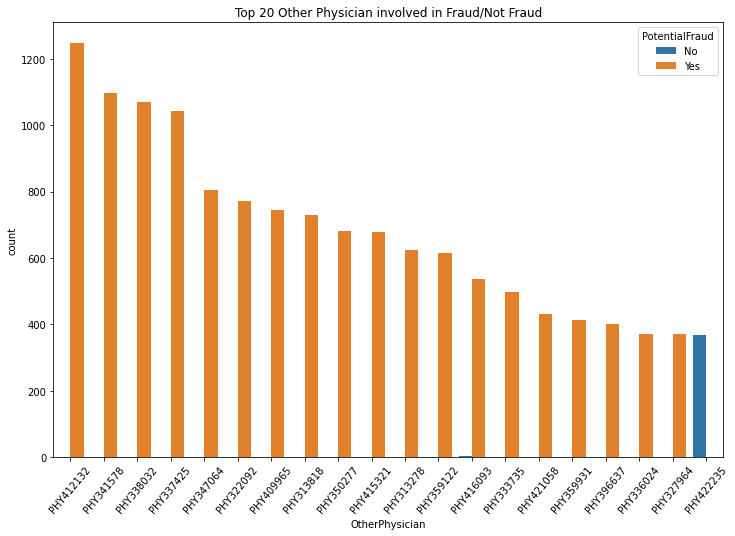

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='OtherPhysician',hue='PotentialFraud',data=final_train,
              order=final_train['OtherPhysician'].value_counts().head(20).index)

plt.xticks(rotation=50)
plt.title('Top 20 Other Physician involved in Fraud/Not Fraud')
plt.show()

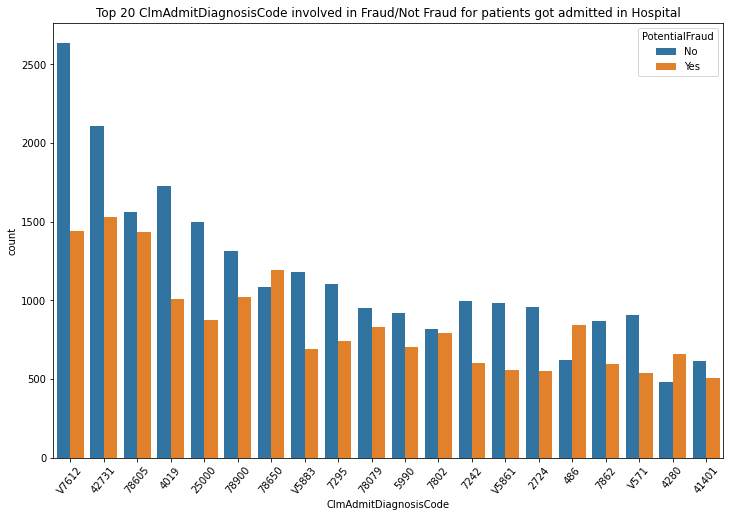

In [ ]:
### Top ClmAdmitDiagnosisCode involved in Fraud or Not for inpatient 

plt.figure(figsize=(12,8))
sns.countplot(x='ClmAdmitDiagnosisCode',hue='PotentialFraud',data=final_train,
              order=final_train['ClmAdmitDiagnosisCode'].value_counts().head(20).index)

plt.xticks(rotation=50)
plt.title('Top 20 ClmAdmitDiagnosisCode involved in Fraud/Not Fraud for patients got admitted in Hospital')
plt.show()

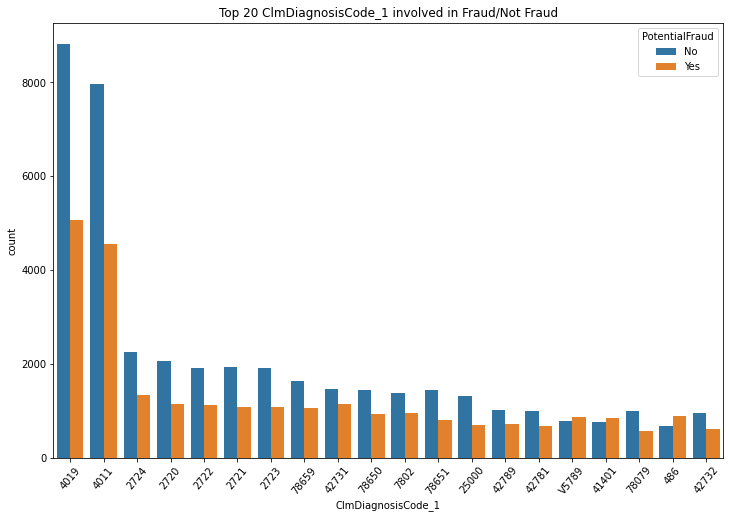

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=final_train,
              order=final_train['ClmDiagnosisCode_1'].value_counts().head(20).index)

plt.xticks(rotation=50)
plt.title('Top 20 ClmDiagnosisCode_1 involved in Fraud/Not Fraud')
plt.show()

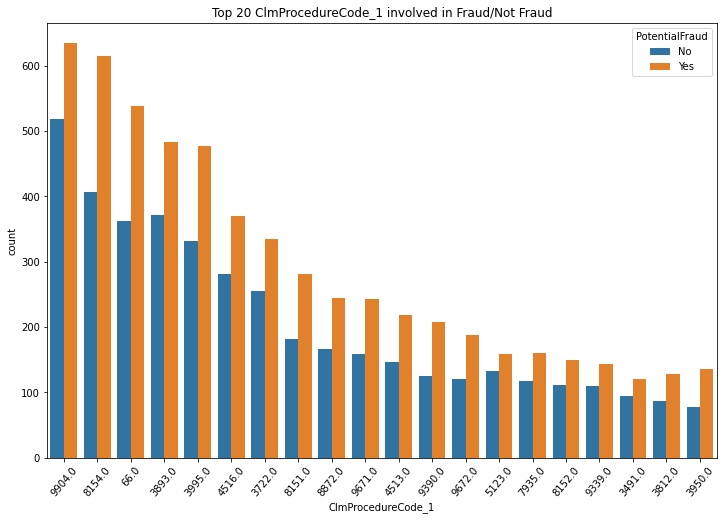

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=final_train,
              order=final_train['ClmProcedureCode_1'].value_counts().head(20).index)

plt.xticks(rotation=50)
plt.title('Top 20 ClmProcedureCode_1 involved in Fraud/Not Fraud')
plt.show()

In [ ]:
# final_train.to_csv('final_train_capstone.csv')

In [ ]:
final_train.isnull().sum()/len(final_train)*100

Provider                             0.000000
PotentialFraud                       0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                

#### We cant just impute the missing values because this final data has some claim which doesn't necessarily include all the claim diagonisis or procedure codes for a single claim.So naturaly some of the columns has no values for one paticular claim record.

#### Even we cant drop the ClmProcedureCode_6 blindly as it has 100% missing values because in the future test data some patient/benificary might have this ProcedureCode_6 for their claim.

## Feature Extraction

In [ ]:
final_train.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,...,1,1,1,2,2,2,2020,1068,6700,2700
1,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1,1,1,2,2,1,36000,1068,3520,140
2,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,2,2,2,2,2,2,95000,2136,2270,900
3,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70,PHY402512,NaN,NaN,...,2,2,1,1,2,2,5000,1068,370,70
4,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,1,1,1,2,1,2,3000,1068,0,0


In [ ]:
final_train['ClaimID'].duplicated().sum() ### All the ClaimId are unique

0

In [ ]:
final_train.groupby(['BeneID'])['ClaimID'].count().head() ## One beneficary has multiple calims

BeneID
BENE100000     2
BENE100001    10
BENE100002    14
BENE100003     1
BENE100004     6
Name: ClaimID, dtype: int64

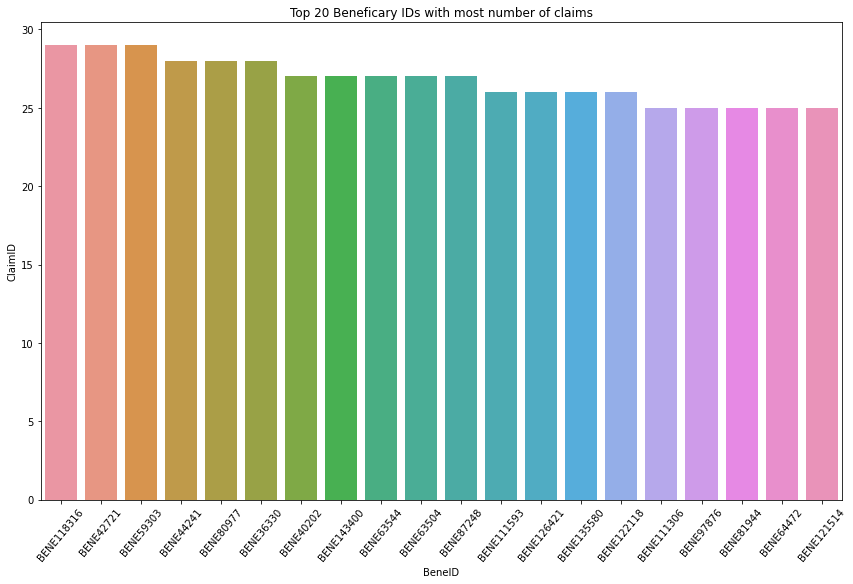

In [ ]:
## Top 20 Beneficary IDs with most number of claims

plt.figure(figsize=(12,8))
df0 = final_train.groupby(['BeneID'])[['ClaimID']].count().reset_index()
df1= df0.sort_values('ClaimID', ascending=False).head(20)
sns.barplot(df1['BeneID'],df1['ClaimID'])
plt.xticks(rotation= 50)
plt.tight_layout()
plt.title('Top 20 Beneficary IDs with most number of claims')
plt.show()

In [ ]:
df = final_train['ClaimID'].value_counts().to_frame().reset_index()
df.head()

,index,ClaimID
0,CLM272936,1
1,CLM259789,1
2,CLM443342,1
3,CLM457888,1
4,CLM491705,1


In [ ]:
final_train['No_ofClaims'] = df['ClaimID']

In [ ]:
final_train['No_ofClaims'].value_counts()

1    558211
Name: No_ofClaims, dtype: int64

### As No_ofClaims all only one value repeted throughout  we need to drop this column latter

## isrepeted calim =0 , claims are not repeted(unique)
## isrepeted calim =1, repeted claims

In [ ]:
final_train.loc[final_train['No_ofClaims'] == 1, 'IsRepeted_Claim'] = 0
final_train.loc[final_train['No_ofClaims'] > 1, 'IsRepeted_Claim'] = 1

In [ ]:
final_train['IsRepeted_Claim'].value_counts() ## All the claims are unique

0.0    558211
Name: IsRepeted_Claim, dtype: int64

#### As all the ClaimIDs are all unique,so we need to drop this column latter

## Finding age of the benificary

In [ ]:
final_train['DOB'] = pd.to_datetime(final_train['DOB'] , format = '%Y-%m-%d')
final_train['DOD'] = pd.to_datetime(final_train['DOD'] , format = '%Y-%m-%d')

In [ ]:
import datetime as dt

final_train['Age'] = round(((final_train['DOD'] - final_train['DOB']).dt.days)/365)

In [ ]:
final_train['DOD'].max()

Timestamp('2009-12-01 00:00:00')

In [ ]:
## As the last DOD is of 2009-12-01, so this dataset is of year 2009.
## so we can substract this date with the DOB to get the age of the benificaries where their DOD is missing

In [ ]:
final_train['Age'].fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - final_train['DOB']).dt.days)/365),inplace=True)

In [ ]:
final_train['Age'].isnull().sum()

0

#### Find the no of days the patient was admited in the hospital

In [ ]:
final_train['AdmissionDt'] = pd.to_datetime(final_train['AdmissionDt'] , format = '%Y-%m-%d')
final_train['DischargeDt'] = pd.to_datetime(final_train['DischargeDt'],format = '%Y-%m-%d')

In [ ]:
final_train['Days_stayed_inhospital'] = ((final_train['DischargeDt'] - final_train['AdmissionDt']).dt.days)

In [ ]:
final_train['Days_stayed_inhospital'].notnull().sum()

40474

In [ ]:
final_train['Days_stayed_inhospital'].isnull().sum()/len(final_train)*100

92.7493367203441

## Patient visit type

#### 1= inpatient(minority) and 0= outpatient(majority)

In [ ]:
final_train.loc[final_train['Days_stayed_inhospital'].isnull(), 'Patient_visitType'] = 0
final_train.loc[final_train['Days_stayed_inhospital'].notnull(), 'Patient_visitType'] = 1

In [ ]:
final_train['Patient_visitType'].value_counts()/len(final_train)*100

0.0    92.749337
1.0     7.250663
Name: Patient_visitType, dtype: float64

In [ ]:
## no of patients that was actualy admitted

In [ ]:
inpatient.shape

(40474, 30)

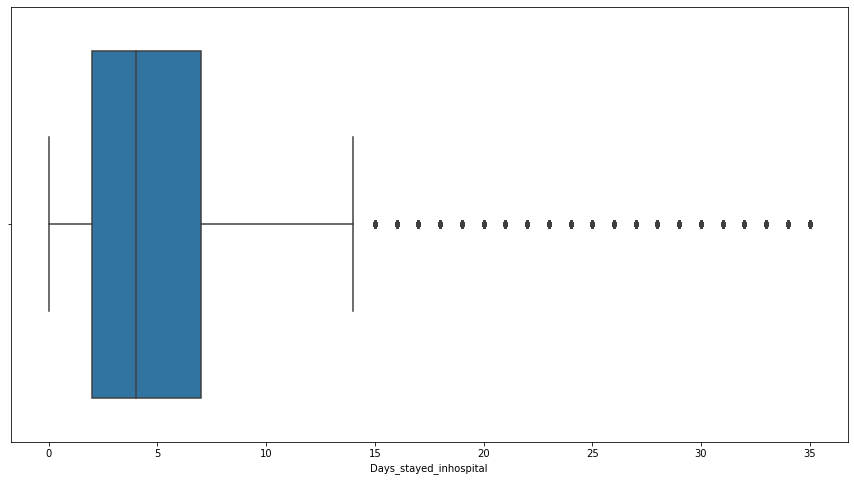

In [ ]:
sns.boxplot(final_train['Days_stayed_inhospital'])

#### Create a new variable 'DeadorNot' where 1 = Dead , 0 = not Dead

In [ ]:
final_train['DOD'].isnull().sum()

554080

In [ ]:
final_train.loc[final_train['DOD'].isnull(), 'DeadorNot'] = 0
final_train.loc[final_train['DOD'].notnull(), 'DeadorNot'] = 1

In [ ]:
final_train['DeadorNot'].value_counts()

0.0    554080
1.0      4131
Name: DeadorNot, dtype: int64

In [ ]:
final_train.shape

(558211, 61)

### Days taken to shettle the claims

In [ ]:
final_train['ClaimStartDt'] = pd.to_datetime(final_train['ClaimStartDt'] , format = '%Y-%m-%d')
final_train['ClaimEndDt'] = pd.to_datetime(final_train['ClaimEndDt'],format = '%Y-%m-%d')

In [ ]:
final_train['Days_to_settle_claim'] = ((final_train['ClaimEndDt'] - final_train['ClaimStartDt']).dt.days)

In [ ]:
final_train['Days_to_settle_claim'].describe()

count    558211.000000
mean          1.727940
std           4.904984
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: Days_to_settle_claim, dtype: float64

### checking duplicates

In [ ]:
final_train['Provider'].duplicated().value_counts()

True     552801
False      5410
Name: Provider, dtype: int64

In [ ]:
final_train['BeneID'].duplicated().value_counts()

True     419655
False    138556
Name: BeneID, dtype: int64

In [ ]:
final_train['ClaimID'].duplicated().value_counts() ### All are unique 

False    558211
Name: ClaimID, dtype: int64

In [ ]:
final_train['AttendingPhysician'].duplicated().value_counts()

True     476147
False     82064
Name: AttendingPhysician, dtype: int64

In [ ]:
final_train['OperatingPhysician'].duplicated().value_counts()

True     522895
False     35316
Name: OperatingPhysician, dtype: int64

In [ ]:
final_train['OtherPhysician'].duplicated().value_counts()

True     511753
False     46458
Name: OtherPhysician, dtype: int64

In [ ]:
final_train.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,No_ofClaims,IsRepeted_Claim,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim
0,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,...,1068,6700,2700,1,0.0,74.0,NaN,0.0,0.0,1
1,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,1068,3520,140,1,0.0,69.0,4.0,1.0,0.0,4
2,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,2136,2270,900,1,0.0,72.0,2.0,1.0,0.0,2
3,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70,PHY402512,NaN,NaN,...,1068,370,70,1,0.0,91.0,NaN,0.0,0.0,0
4,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,1068,0,0,1,0.0,75.0,5.0,1.0,0.0,5


### No of total unique physicians in indivisual claims

In [ ]:
num_of_physician = final_train[['AttendingPhysician','OperatingPhysician','OtherPhysician']].values

count = []
for i in range(len(num_of_physician)):
    x= pd.DataFrame(num_of_physician[i]).nunique()[0]
    count.append(x)
    
final_train['num_of_uniquePhysicians'] = count

### Total physicians checked the patient as per the Claim

In [ ]:
total_phy = final_train[['AttendingPhysician','OperatingPhysician','OtherPhysician']].fillna(0).values


count= []
for i in range(len(total_phy)):
    count.append(np.count_nonzero(total_phy[i]))
    
final_train['Total_PhysiciansChecked'] = count

## Repeted Physican or not

In [ ]:
final_train[['AttendingPhysician' ,'OperatingPhysician','OtherPhysician' ]].head()

,AttendingPhysician,OperatingPhysician,OtherPhysician
0,PHY318842,PHY392882,NaN
1,PHY340163,NaN,NaN
2,PHY346762,NaN,NaN
3,PHY402512,NaN,NaN
4,PHY383193,NaN,NaN


In [ ]:
final_train['Total_PhysiciansChecked'].value_counts()

1    286625
2    226048
3     44055
0      1483
Name: Total_PhysiciansChecked, dtype: int64

In [ ]:
final_train['num_of_uniquePhysicians'].value_counts()

1    403656
2    141116
3     11956
0      1483
Name: num_of_uniquePhysicians, dtype: int64

In [ ]:
final_train['totaltounique'] = final_train['Total_PhysiciansChecked'] - final_train['num_of_uniquePhysicians']

In [ ]:
final_train['totaltounique'].value_counts()

0    422257
1    122778
2     13176
Name: totaltounique, dtype: int64

0 = Repeted Physicans are not there(majority), 1= Repeted Physicans are there(minority)

In [ ]:
final_train.loc[final_train['totaltounique'] == 0,'Repeted_Physician'] = 0
final_train.loc[((final_train['totaltounique'] == 1)| (final_train['totaltounique'] == 2)) ,'Repeted_Physician'] = 1

In [ ]:
final_train['Repeted_Physician'].value_counts()

0.0    422257
1.0    135954
Name: Repeted_Physician, dtype: int64

## Drop the column totaltounique

In [ ]:
final_train.drop(['totaltounique'], axis=1,inplace=True)

In [ ]:
final_train.isnull().sum()

Provider                   0
PotentialFraud             0
BeneID                     0
ClaimID                    0
ClaimStartDt               0
                          ..
DeadorNot                  0
Days_to_settle_claim       0
num_of_uniquePhysicians    0
Total_PhysiciansChecked    0
Repeted_Physician          0
Length: 65, dtype: int64

### Total no of Diagonisis & Procedures Codes for each claim 

In [ ]:
TotalClmDiagnosisCount = final_train.groupby(by = ['ClaimID'])['ClmAdmitDiagnosisCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
                             'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                             'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'].count().sort_values(by = 'ClaimID').sum(axis = 1).to_frame().reset_index()

final_train['TotalClmDiagnosisCount'] = TotalClmDiagnosisCount[0]


In [ ]:

TotalClmProcedureCount = final_train.groupby(by = 'ClaimID')['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
                            'ClmProcedureCode_5','ClmProcedureCode_6'].count().sort_values(by = 'ClaimID').sum(axis = 1).to_frame().reset_index()

final_train['TotalClmProcedureCount'] = TotalClmProcedureCount[0]

### Encoding of Diagonisis & Procedure Codes

In [ ]:
final_train['ClmDiagnosisCode_1'].isnull().sum()

10453

In [ ]:
final_train['ClmDiagnosisCode_1'].fillna(0,inplace=True)

In [ ]:
final_train['ClmDiagnosisCode_1'] = final_train['ClmDiagnosisCode_1'].astype('category').cat.codes

In [ ]:
# dc1 = final_train['ClmDiagnosisCode_1'].value_counts().to_dict()

# final_train['DiagnosisCode1_count'] = final_train['ClmDiagnosisCode_1'].map(dc1)

# ## Filling the missing values with 0 and we cant use any imputation techinique here are these are unique codes 
# ## and we cant generate it .

# final_train['DiagnosisCode1_count'] = final_train['DiagnosisCode1_count'].fillna(0)

In [ ]:
final_train['ClmDiagnosisCode_2'].fillna(0,inplace=True)

final_train['ClmDiagnosisCode_2'] = final_train['ClmDiagnosisCode_2'].astype('category').cat.codes

final_train['ClmDiagnosisCode_2'].isnull().sum()

0

In [ ]:
final_train['ClmDiagnosisCode_3'].fillna(0,inplace=True)

final_train['ClmDiagnosisCode_3'] = final_train['ClmDiagnosisCode_3'].astype('category').cat.codes

final_train['ClmDiagnosisCode_3'].isnull().sum()

0

In [ ]:
final_train['ClmDiagnosisCode_4'].fillna(0,inplace=True)

final_train['ClmDiagnosisCode_4'] = final_train['ClmDiagnosisCode_4'].astype('category').cat.codes

final_train['ClmDiagnosisCode_4'].isnull().sum()

0

In [ ]:
final_train['ClmDiagnosisCode_5'].fillna(0,inplace=True)

final_train['ClmDiagnosisCode_5'] = final_train['ClmDiagnosisCode_5'].astype('category').cat.codes

final_train['ClmDiagnosisCode_5'].isnull().sum()

0

In [ ]:
final_train['ClmDiagnosisCode_6'].fillna(0,inplace=True)

final_train['ClmDiagnosisCode_6'] = final_train['ClmDiagnosisCode_6'].astype('category').cat.codes

final_train['ClmDiagnosisCode_6'].isnull().sum()

0

In [ ]:
final_train['ClmDiagnosisCode_7'].fillna(0,inplace=True)

final_train['ClmDiagnosisCode_7'] = final_train['ClmDiagnosisCode_7'].astype('category').cat.codes

final_train['ClmDiagnosisCode_7'].isnull().sum()

0

In [ ]:
final_train['ClmDiagnosisCode_8'].fillna(0,inplace=True)

final_train['ClmDiagnosisCode_8'] = final_train['ClmDiagnosisCode_8'].astype('category').cat.codes

final_train['ClmDiagnosisCode_8'].isnull().sum()

0

In [ ]:
final_train['ClmDiagnosisCode_9'].fillna(0,inplace=True)

final_train['ClmDiagnosisCode_9'] = final_train['ClmDiagnosisCode_9'].astype('category').cat.codes

final_train['ClmDiagnosisCode_9'].isnull().sum()

0

In [ ]:
final_train['ClmDiagnosisCode_10'].fillna(0,inplace=True)

final_train['ClmDiagnosisCode_10'] = final_train['ClmDiagnosisCode_10'].astype('category').cat.codes

final_train['ClmDiagnosisCode_10'].isnull().sum()

0

In [ ]:
final_train['ClmProcedureCode_1'].fillna(0,inplace=True)

final_train['ClmProcedureCode_1'] = final_train['ClmProcedureCode_1'].astype('category').cat.codes

final_train['ClmProcedureCode_1'].isnull().sum()

0

In [ ]:
final_train['ClmProcedureCode_2'].fillna(0,inplace=True)

final_train['ClmProcedureCode_2'] = final_train['ClmProcedureCode_2'].astype('category').cat.codes

final_train['ClmProcedureCode_2'].isnull().sum()

0

In [ ]:
final_train['ClmProcedureCode_3'].fillna(0,inplace=True)

final_train['ClmProcedureCode_3'] = final_train['ClmProcedureCode_3'].astype('category').cat.codes

final_train['ClmProcedureCode_3'].isnull().sum()

0

In [ ]:
final_train['ClmProcedureCode_4'].fillna(0,inplace=True)

final_train['ClmProcedureCode_4'] = final_train['ClmProcedureCode_4'].astype('category').cat.codes

final_train['ClmProcedureCode_4'].isnull().sum()

0

In [ ]:
final_train['ClmProcedureCode_5'].fillna(0,inplace=True)

final_train['ClmProcedureCode_5'] = final_train['ClmProcedureCode_5'].astype('category').cat.codes

final_train['ClmProcedureCode_5'].isnull().sum()

0

In [ ]:

final_train['ClmAdmitDiagnosisCode'].fillna(0,inplace=True)

final_train['ClmAdmitDiagnosisCode'] = final_train['ClmAdmitDiagnosisCode'].astype('category').cat.codes

final_train['ClmAdmitDiagnosisCode'].isnull().sum()


0

#### For ClmProcedureCode_6 we are not considering the count as it has 100% missing values ,so we need to drop it as we have no seperate test data set to validate . 

#### But in case there is scope of future data validation we can not drop this particular column if it contains values in future dataset.


In [ ]:
final_train[['ClaimID','ClmAdmitDiagnosisCode','ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
                             'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                             'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']]

In [ ]:
final_train.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim,num_of_uniquePhysicians,Total_PhysiciansChecked,Repeted_Physician,TotalClmDiagnosisCount,TotalClmProcedureCount
0,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,...,74.0,NaN,0.0,0.0,1,2,2,0.0,1,0
1,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,69.0,4.0,1.0,0.0,4,1,1,0.0,3,0
2,PRV51001,No,BENE38773,CLM52334,2009-05-23,2009-05-25,12000,PHY346762,NaN,NaN,...,72.0,2.0,1.0,0.0,2,1,1,0.0,1,0
3,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70,PHY402512,NaN,NaN,...,91.0,NaN,0.0,0.0,0,1,1,0.0,4,0
4,PRV51001,No,BENE98831,CLM36844,2009-02-03,2009-02-08,3000,PHY383193,NaN,NaN,...,75.0,5.0,1.0,0.0,5,1,1,0.0,2,0


In [ ]:
final_train.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depres

### Droping Redundant Columns

In [ ]:
Redundant_columns = ['Provider','BeneID','ClaimStartDt','ClaimEndDt',
                      'DischargeDt','AdmissionDt','DiagnosisGroupCode','ClmProcedureCode_6',
                     'DOB', 'DOD','No_ofClaims','IsRepeted_Claim','num_of_uniquePhysicians']

final_train.drop(Redundant_columns, axis=1,inplace=True)

In [ ]:
final_train.shape

(558211, 54)

### Imputing Null/missing values

In [ ]:
## As Days_stayed_inhospital is not applicable for outpatient so we impute it with 0
final_train['Days_stayed_inhospital'].fillna(0,inplace=True)

## As for some claim the DeductibleAmtPaid can be 0 so, impute null with 0
final_train['DeductibleAmtPaid'].fillna(0,inplace=True)

In [ ]:
final_train.isnull().sum()/len(final_train)*100

PotentialFraud                      0.000000
ClaimID                             0.000000
InscClaimAmtReimbursed              0.000000
AttendingPhysician                  0.270149
OperatingPhysician                 79.497538
OtherPhysician                     64.218548
ClmAdmitDiagnosisCode               0.000000
DeductibleAmtPaid                   0.000000
ClmDiagnosisCode_1                  0.000000
ClmDiagnosisCode_2                  0.000000
ClmDiagnosisCode_3                  0.000000
ClmDiagnosisCode_4                  0.000000
ClmDiagnosisCode_5                  0.000000
ClmDiagnosisCode_6                  0.000000
ClmDiagnosisCode_7                  0.000000
ClmDiagnosisCode_8                  0.000000
ClmDiagnosisCode_9                  0.000000
ClmDiagnosisCode_10                 0.000000
ClmProcedureCode_1                  0.000000
ClmProcedureCode_2                  0.000000
ClmProcedureCode_3                  0.000000
ClmProcedureCode_4                  0.000000
ClmProcedu

In [ ]:
final_train.dtypes

PotentialFraud                      object
ClaimID                             object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OperatingPhysician                  object
OtherPhysician                      object
ClmAdmitDiagnosisCode                int16
DeductibleAmtPaid                  float64
ClmDiagnosisCode_1                   int16
ClmDiagnosisCode_2                   int16
ClmDiagnosisCode_3                   int16
ClmDiagnosisCode_4                   int16
ClmDiagnosisCode_5                   int16
ClmDiagnosisCode_6                   int16
ClmDiagnosisCode_7                   int16
ClmDiagnosisCode_8                   int16
ClmDiagnosisCode_9                   int16
ClmDiagnosisCode_10                  int16
ClmProcedureCode_1                   int16
ClmProcedureCode_2                   int16
ClmProcedureCode_3                   int16
ClmProcedureCode_4                    int8
ClmProcedureCode_5                    int8
Gender     

In [ ]:
final_df = final_train.copy(deep=True)

In [ ]:
final_df.shape

(558211, 54)

### Encoding

In [ ]:
final_df.head()

,PotentialFraud,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,OPAnnualDeductibleAmt,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim,Total_PhysiciansChecked,Repeted_Physician,TotalClmDiagnosisCount,TotalClmProcedureCount
0,No,CLM272936,500,PHY318842,PHY392882,NaN,3066,0.0,7299,4967,...,2700,74.0,0.0,0.0,0.0,1,2,0.0,1,0
1,No,CLM58316,36000,PHY340163,NaN,NaN,860,1068.0,2215,993,...,140,69.0,4.0,1.0,0.0,4,1,0.0,3,0
2,No,CLM52334,12000,PHY346762,NaN,NaN,28,1068.0,193,2567,...,900,72.0,2.0,1.0,0.0,2,1,0.0,1,0
3,No,CLM452024,70,PHY402512,NaN,NaN,3064,0.0,7300,0,...,70,91.0,0.0,0.0,0.0,0,1,0.0,4,0
4,No,CLM36844,3000,PHY383193,NaN,NaN,1980,1068.0,4973,2404,...,0,75.0,5.0,1.0,0.0,5,1,0.0,2,0


In [ ]:
final_df['PotentialFraud'].replace(to_replace=['No', 'Yes'],value=[0,1],inplace=True)

In [ ]:
final_df['RenalDiseaseIndicator'].replace(to_replace='Y',value=1,inplace=True)
final_df['ChronicCond_Alzheimer'].replace(to_replace=[2,1],value=[0,1],inplace=True)
final_df['ChronicCond_Heartfailure'].replace(to_replace=[1,2],value=[1,0],inplace=True)
final_df['ChronicCond_KidneyDisease'].replace(to_replace=[2,1],value=[0,1],inplace=True)
final_df['ChronicCond_Cancer'].replace(to_replace=[2,1],value=[0,1],inplace=True)
final_df['ChronicCond_ObstrPulmonary'].replace(to_replace=[2,1],value=[0,1],inplace=True)
final_df['ChronicCond_Depression'].replace(to_replace=[2,1],value=[0,1],inplace=True)
final_df['ChronicCond_KidneyDisease'].replace(to_replace=[2,1],value=[0,1],inplace=True)
final_df['ChronicCond_Diabetes'].replace(to_replace=[2,1],value=[0,1],inplace=True)
final_df['ChronicCond_IschemicHeart'].replace(to_replace=[1,2],value=[1,0],inplace=True)
final_df['ChronicCond_Osteoporasis'].replace(to_replace=[2,1],value=[0,1],inplace=True)
final_df['ChronicCond_rheumatoidarthritis'].replace(to_replace=[2,1],value=[0,1],inplace=True)
final_df['ChronicCond_stroke'].replace(to_replace=[2,1],value=[0,1],inplace=True)

In [ ]:
final_df['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

In [ ]:
final_df['RenalDiseaseIndicator'] = final_df['RenalDiseaseIndicator'].astype('int64')

In [ ]:
final_df['TotalDiseaseCount'] = final_df['RenalDiseaseIndicator']+final_df['ChronicCond_Alzheimer']+final_df['ChronicCond_Heartfailure']+final_df['ChronicCond_KidneyDisease']+final_df['ChronicCond_Cancer']+final_df['ChronicCond_ObstrPulmonary']+final_df['ChronicCond_Depression']+final_df['ChronicCond_Diabetes']+final_df['ChronicCond_IschemicHeart']+final_df['ChronicCond_Osteoporasis']+final_df['ChronicCond_rheumatoidarthritis']+final_df['ChronicCond_stroke']

In [ ]:
final_df.drop(['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke'],axis = 1,inplace = True)

In [ ]:
final_df.drop(['AttendingPhysician','OperatingPhysician','OtherPhysician'],axis = 1,inplace = True)

In [ ]:
final_df.head()

,PotentialFraud,ClaimID,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,...,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim,Total_PhysiciansChecked,Repeted_Physician,TotalClmDiagnosisCount,TotalClmProcedureCount,TotalDiseaseCount
0,0,CLM272936,500,3066,0.0,7299,4967,2138,574,903,...,74.0,0.0,0.0,0.0,1,2,0.0,1,0,8
1,0,CLM58316,36000,860,1068.0,2215,993,947,3965,72,...,69.0,4.0,1.0,0.0,4,1,0.0,3,0,6
2,0,CLM52334,12000,28,1068.0,193,2567,718,607,2208,...,72.0,2.0,1.0,0.0,2,1,0.0,1,0,1
3,0,CLM452024,70,3064,0.0,7300,0,0,0,0,...,91.0,0.0,0.0,0.0,0,1,0.0,4,0,4
4,0,CLM36844,3000,1980,1068.0,4973,2404,5,2082,1691,...,75.0,5.0,1.0,0.0,5,1,0.0,2,0,6


In [ ]:
final_df.isnull().sum()/len(final_train)*100

PotentialFraud              0.0
ClaimID                     0.0
InscClaimAmtReimbursed      0.0
ClmAdmitDiagnosisCode       0.0
DeductibleAmtPaid           0.0
ClmDiagnosisCode_1          0.0
ClmDiagnosisCode_2          0.0
ClmDiagnosisCode_3          0.0
ClmDiagnosisCode_4          0.0
ClmDiagnosisCode_5          0.0
ClmDiagnosisCode_6          0.0
ClmDiagnosisCode_7          0.0
ClmDiagnosisCode_8          0.0
ClmDiagnosisCode_9          0.0
ClmDiagnosisCode_10         0.0
ClmProcedureCode_1          0.0
ClmProcedureCode_2          0.0
ClmProcedureCode_3          0.0
ClmProcedureCode_4          0.0
ClmProcedureCode_5          0.0
Gender                      0.0
Race                        0.0
State                       0.0
County                      0.0
NoOfMonths_PartACov         0.0
NoOfMonths_PartBCov         0.0
IPAnnualReimbursementAmt    0.0
IPAnnualDeductibleAmt       0.0
OPAnnualReimbursementAmt    0.0
OPAnnualDeductibleAmt       0.0
Age                         0.0
Days_sta

In [ ]:
final_data = final_df.copy(deep=True)

In [ ]:
final_data.shape

(558211, 40)

In [ ]:
final_data.to_csv('Healthcare_fraud1.csv', index=False)

In [ ]:
final_data.isnull().sum()

PotentialFraud              0
ClaimID                     0
InscClaimAmtReimbursed      0
ClmAdmitDiagnosisCode       0
DeductibleAmtPaid           0
ClmDiagnosisCode_1          0
ClmDiagnosisCode_2          0
ClmDiagnosisCode_3          0
ClmDiagnosisCode_4          0
ClmDiagnosisCode_5          0
ClmDiagnosisCode_6          0
ClmDiagnosisCode_7          0
ClmDiagnosisCode_8          0
ClmDiagnosisCode_9          0
ClmDiagnosisCode_10         0
ClmProcedureCode_1          0
ClmProcedureCode_2          0
ClmProcedureCode_3          0
ClmProcedureCode_4          0
ClmProcedureCode_5          0
Gender                      0
Race                        0
State                       0
County                      0
NoOfMonths_PartACov         0
NoOfMonths_PartBCov         0
IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
Age                         0
Days_stayed_inhospital      0
Patient_visitType           0
DeadorNot 

In [ ]:
final_data.columns

Index(['PotentialFraud', 'ClaimID', 'InscClaimAmtReimbursed',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'Gender', 'Race', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'Days_stayed_inhospital', 'Patient_visitType', 'DeadorNot',
       'Days_to_settle_claim', 'Total_PhysiciansChecked', 'Repeted_Physician',
       'TotalClmDiagnosisCount', 'TotalClmProcedureCount',
       'TotalDiseaseCount'],
      dtype='object')

In [ ]:
final_data['PotentialFraud'].value_counts()/len(final_df)*100 ## No class Imbalance

0    61.878931
1    38.121069
Name: PotentialFraud, dtype: float64

In [ ]:
final_data.columns

Index(['PotentialFraud', 'ClaimID', 'InscClaimAmtReimbursed',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'Gender', 'Race', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'Days_stayed_inhospital', 'Patient_visitType', 'DeadorNot',
       'Days_to_settle_claim', 'Total_PhysiciansChecked', 'Repeted_Physician',
       'TotalClmDiagnosisCount', 'TotalClmProcedureCount',
       'TotalDiseaseCount'],
      dtype='object')

In [ ]:
# final_data.to_csv('FinalData_capstone.csv')

In [ ]:
final_data.duplicated().sum() ## No duplicates present

0

In [ ]:
final_df_num = final_data[['InscClaimAmtReimbursed','DeductibleAmtPaid','NoOfMonths_PartACov','NoOfMonths_PartBCov',
                         'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt',
                        'Age','Days_stayed_inhospital','Days_to_settle_claim','TotalClmDiagnosisCount', 'TotalClmProcedureCount',
                        'TotalDiseaseCount','Total_PhysiciansChecked']]


final_df_cat = final_data.drop(['InscClaimAmtReimbursed','DeductibleAmtPaid','NoOfMonths_PartACov','NoOfMonths_PartBCov',
                         'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt',
                        'Age','Days_stayed_inhospital','Days_to_settle_claim',
                        'TotalDiseaseCount','TotalClmDiagnosisCount', 'TotalClmProcedureCount','Total_PhysiciansChecked'],axis=1)

In [ ]:
print(final_df_num.shape)
print(final_df_cat.shape)

(558211, 15)
(558211, 25)


In [ ]:
final_df_num.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Days_stayed_inhospital,Days_to_settle_claim,TotalClmDiagnosisCount,TotalClmProcedureCount,TotalDiseaseCount,Total_PhysiciansChecked
0,500,0.0,12,12,2020,1068,6700,2700,74.0,0.0,1,1,0,8,2
1,36000,1068.0,12,12,36000,1068,3520,140,69.0,4.0,4,3,0,6,1
2,12000,1068.0,12,12,95000,2136,2270,900,72.0,2.0,2,1,0,1,1
3,70,0.0,12,12,5000,1068,370,70,91.0,0.0,0,4,0,4,1
4,3000,1068.0,12,12,3000,1068,0,0,75.0,5.0,5,2,0,6,1


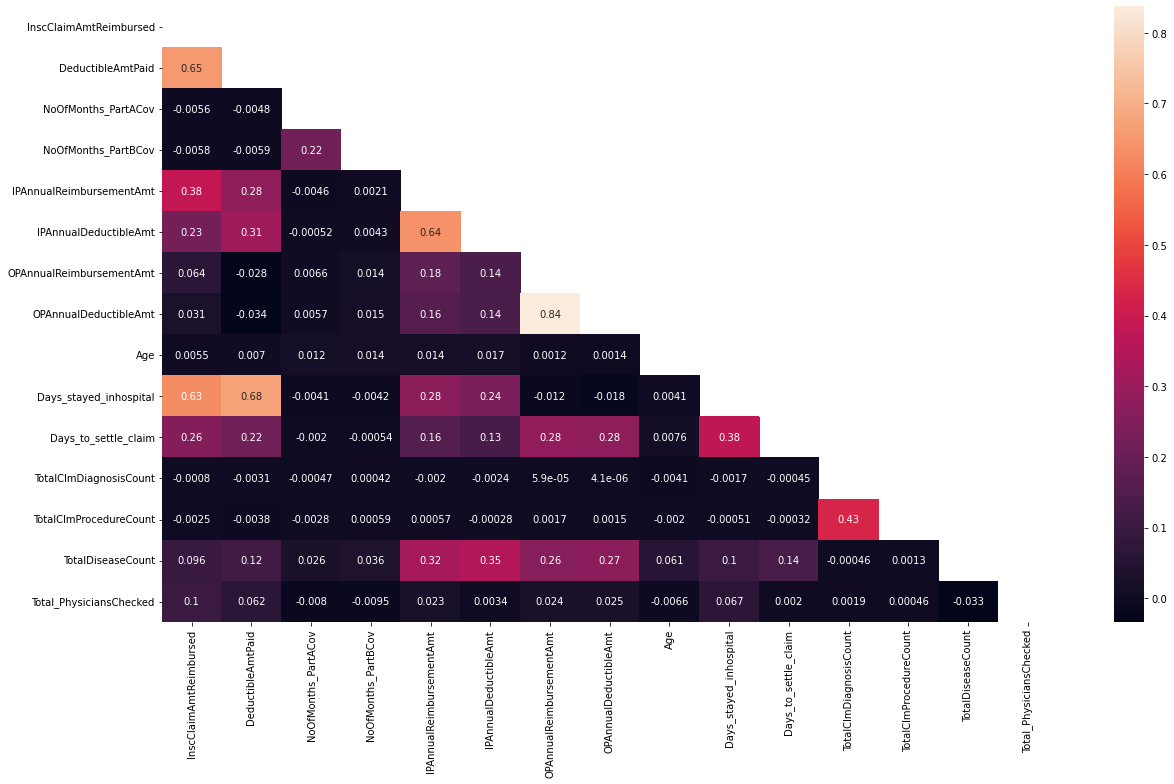

In [ ]:
## To check corelation among numerical independent variable

plt.figure(figsize=(18,11))
corr_mx = final_df_num.corr()
matrix = np.triu(corr_mx)

sns.heatmap(corr_mx, mask=matrix, annot=True)
plt.tight_layout()
plt.show()

## OP Annual Deductible Amount and OP Annual Reimbursement Amount is highly corelated(0.84)
## IP Annual Deductible Amount and IP Annual Reimbursement Amount is highly corelated(0.64)
## Days stayed at hospital and Inc Claim Amt.Reimbursed  highly corelated(0.63)
## Deductiable Amt. Paid and Inc Claim Amt.Reimbursed  highly corelated(0.65)
## Days stayed at hospital and Deductiable Amt. Paid highly corelated(0.68)

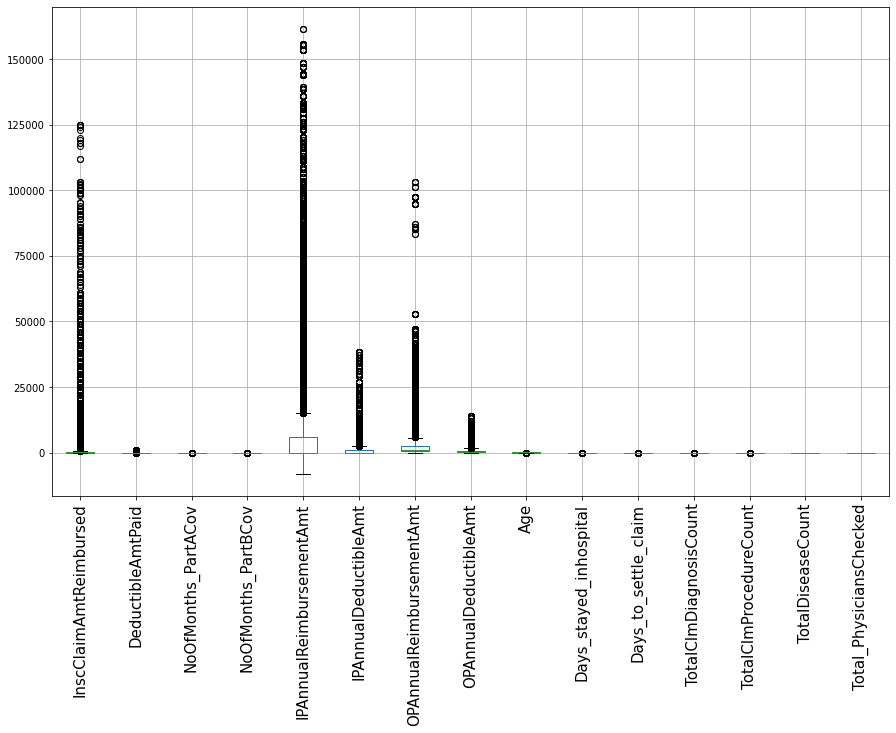

In [ ]:
plt.figure(figsize = (15,9))
final_df_num.boxplot()

plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

## Statistical Tests

In [ ]:
final_df_cat.head()

,PotentialFraud,ClaimID,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,Gender,Race,State,County,Patient_visitType,DeadorNot,Repeted_Physician
0,0,CLM272936,3066,7299,4967,2138,574,903,375,0,...,0,0,0,1,1,1,410,0.0,0.0,0.0
1,0,CLM58316,860,2215,993,947,3965,72,534,2271,...,0,0,0,1,1,1,510,1.0,0.0,0.0
2,0,CLM52334,28,193,2567,718,607,2208,3164,0,...,0,0,0,1,1,1,160,1.0,0.0,0.0
3,0,CLM452024,3064,7300,0,0,0,0,0,0,...,0,0,0,1,1,1,510,0.0,0.0,0.0
4,0,CLM36844,1980,4973,2404,5,2082,1691,492,2286,...,0,0,0,2,1,1,510,1.0,0.0,0.0


In [ ]:
final_data.shape

(558211, 40)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,cohen_kappa_score, confusion_matrix,classification_report, accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [ ]:
x = final_data.drop(['ClaimID','PotentialFraud'],axis=1)
y = final_data['PotentialFraud']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=100 )

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(446568, 38)
(111643, 38)


# Checking if the traget is representative of the population

In [ ]:
# H0 = mean of ytrain and ytest is same , so they are from the same population
# H1 = mean of ytrain and ytest is not same , so atleast one of them from the same population

In [ ]:
from scipy.stats import  ttest_ind 

ttest_ind(ytrain, ytest)

Ttest_indResult(statistic=-0.5132303639866175, pvalue=0.6077903915241221)

In [ ]:
## As the P Value > 0.05 so, we fail to reject the H0, we can conclude that the mean of ytrain and ytest is same , so they are from the same population.

## Baseline Model

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(xtrain,ytrain)
LR_Predict=LR_model.predict(xtest)

In [ ]:
lr_train= LR_model.predict(xtrain)

print ('Train Accuracy: ',accuracy_score(ytrain,lr_train))
print ('Test Accuracy: ',accuracy_score(ytest,LR_Predict))

Train Accuracy:  0.6296196771824224
Test Accuracy:  0.6291751386114669


In [ ]:
ypred_proba_lr = LR_model.predict_proba(xtest)[:,1]
roc_auc_score(ytest,ypred_proba_lr)

0.5338995027298092

In [ ]:
cohen_kappa_score(ytest,LR_Predict)

0.06750148346509666

In [ ]:
f1_score(ytest,LR_Predict)

0.1735867135100607

In [ ]:
print(classification_report(ytest,LR_Predict))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76     69009
           1       0.58      0.10      0.17     42634

    accuracy                           0.63    111643
   macro avg       0.61      0.53      0.47    111643
weighted avg       0.61      0.63      0.54    111643



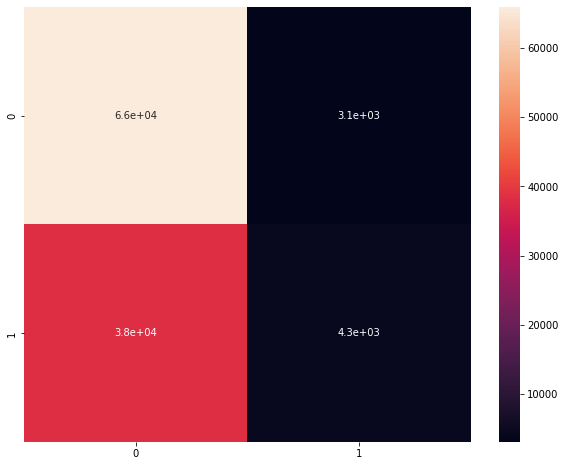

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(ytest,LR_Predict),annot=True)
plt.show()

### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=100)
rf.fit(xtrain,ytrain)
y_pred_rf = rf.predict(xtest)
y_train_rf = rf.predict(xtrain)
ypred_proba_rf = rf.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_rf))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf),'\n')
print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_rf))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_rf),'\n')

print(classification_report(ytest,y_pred_rf))

Train Accuracy:  0.9999955213987567
Test Accuracy:  0.7199466155513556 

ROC-AUC Score:  0.7694452728862797
Cohen Cappa Score:  0.3684505649015256 

              precision    recall  f1-score   support

           0       0.73      0.87      0.79     69009
           1       0.70      0.47      0.56     42634

    accuracy                           0.72    111643
   macro avg       0.71      0.67      0.68    111643
weighted avg       0.72      0.72      0.71    111643



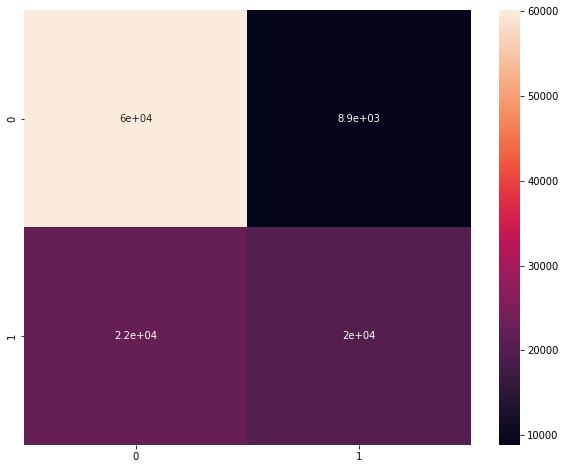

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(ytest,y_pred_rf),annot=True)
plt.show()

In [ ]:
dt = DecisionTreeClassifier(random_state=100)
dt.fit(xtrain,ytrain)
y_pred_dt = dt.predict(xtest)
y_train_dt = dt.predict(xtrain)
ypred_proba_dt = dt.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_dt))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_dt),'\n')
print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_dt))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_dt),'\n')


print(classification_report(ytest,y_pred_dt))

Train Accuracy:  0.9999977606993784
Test Accuracy:  0.6924572073484231 

ROC-AUC Score:  0.6755265817978182
Cohen Cappa Score:  0.350178893107868 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75     69009
           1       0.60      0.60      0.60     42634

    accuracy                           0.69    111643
   macro avg       0.67      0.68      0.68    111643
weighted avg       0.69      0.69      0.69    111643



In [ ]:
print('F1 Score: ',f1_score(ytest,y_pred_dt))

F1 Score:  0.5999417419166908


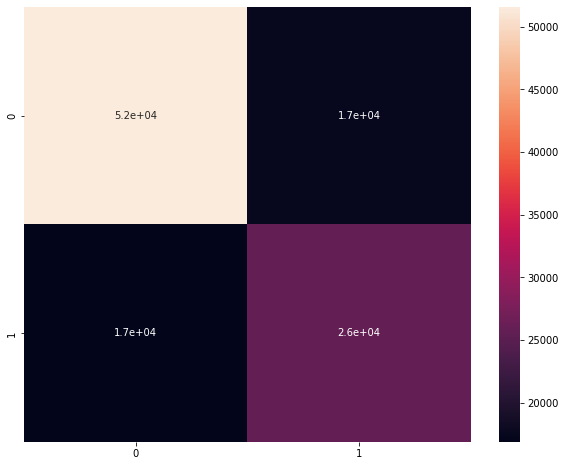

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(ytest,y_pred_dt),annot=True)
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb10 = XGBClassifier(random_state=100)
xgb10.fit(xtrain,ytrain)

y_pred_xgb = xgb10.predict(xtest)
y_train_xgb = xgb10.predict(xtrain)
ypred_proba_xgb = xgb10.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_xgb))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_xgb), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_xgb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_xgb),'\n')

print(confusion_matrix(ytest,y_pred_xgb),'\n')

print(classification_report(ytest,y_pred_xgb))

Train Accuracy:  0.6879221081671772
Test Accuracy:  0.6846465967413989 

ROC-AUC Score:  0.7176334679243404
Cohen Cappa Score:  0.27240521870770074 

[[60544  8465]
 [26742 15892]] 

              precision    recall  f1-score   support

           0       0.69      0.88      0.77     69009
           1       0.65      0.37      0.47     42634

    accuracy                           0.68    111643
   macro avg       0.67      0.63      0.62    111643
weighted avg       0.68      0.68      0.66    111643



In [ ]:
! pip install catboost

     |████████████████████████████████| 76.1 MB 50 kB/s 


In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=100)
cat.fit(xtrain,ytrain)

y_pred_cat = cat.predict(xtest)
y_train_cat = cat.predict(xtrain)
ypred_proba_cat = cat.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_cat))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_cat), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_cat))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_cat),'\n')

print(confusion_matrix(ytest,y_pred_cat),'\n')

print(classification_report(ytest,y_pred_cat))

Learning rate set to 0.139456
0:	learn: 0.6772672	total: 187ms	remaining: 3m 6s
1:	learn: 0.6661678	total: 302ms	remaining: 2m 30s
2:	learn: 0.6577992	total: 415ms	remaining: 2m 17s
3:	learn: 0.6511565	total: 548ms	remaining: 2m 16s
4:	learn: 0.6451590	total: 680ms	remaining: 2m 15s
5:	learn: 0.6403011	total: 796ms	remaining: 2m 11s
6:	learn: 0.6366951	total: 924ms	remaining: 2m 11s
7:	learn: 0.6335593	total: 1.06s	remaining: 2m 11s
8:	learn: 0.6303287	total: 1.18s	remaining: 2m 10s
9:	learn: 0.6282761	total: 1.31s	remaining: 2m 9s
10:	learn: 0.6258871	total: 1.44s	remaining: 2m 9s
11:	learn: 0.6238573	total: 1.69s	remaining: 2m 18s
12:	learn: 0.6222923	total: 1.86s	remaining: 2m 20s
13:	learn: 0.6208892	total: 1.98s	remaining: 2m 19s
14:	learn: 0.6196544	total: 2.11s	remaining: 2m 18s
15:	learn: 0.6176119	total: 2.24s	remaining: 2m 17s
16:	learn: 0.6167067	total: 2.36s	remaining: 2m 16s
17:	learn: 0.6154772	total: 2.48s	remaining: 2m 15s
18:	learn: 0.6138503	total: 2.62s	remaining: 2m

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=100)
lgb.fit(xtrain,ytrain)

y_pred_lgb = lgb.predict(xtest)
y_train_lgb = lgb.predict(xtrain)
ypred_proba_lgb = lgb.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_lgb))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_lgb), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_lgb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_lgb),'\n')

print(confusion_matrix(ytest,y_pred_lgb),'\n')

print(classification_report(ytest,y_pred_lgb))

Train Accuracy:  0.748033894054209
Test Accuracy:  0.7453311000241842 

ROC-AUC Score:  0.7981027888442115
Cohen Cappa Score:  0.4288946973509221 

[[60977  8032]
 [20400 22234]] 

              precision    recall  f1-score   support

           0       0.75      0.88      0.81     69009
           1       0.73      0.52      0.61     42634

    accuracy                           0.75    111643
   macro avg       0.74      0.70      0.71    111643
weighted avg       0.74      0.75      0.73    111643



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=10)
ada.fit(xtrain,ytrain)

y_pred_ada = ada.predict(xtest)
y_train_ada = ada.predict(xtrain)
ypred_proba_ada = ada.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_ada))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_ada), '\n\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_ada))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_ada),'\n\n')

print(classification_report(ytest,y_pred_ada))

Train Accuracy:  0.6597337919421007
Test Accuracy:  0.6572109312720009 


ROC-AUC Score:  0.6827640186642404
Cohen Cappa Score:  0.19559067807968522 


              precision    recall  f1-score   support

           0       0.67      0.88      0.76     69009
           1       0.60      0.30      0.40     42634

    accuracy                           0.66    111643
   macro avg       0.64      0.59      0.58    111643
weighted avg       0.64      0.66      0.62    111643



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
ada = GradientBoostingClassifier(random_state=10)
ada.fit(xtrain,ytrain)

y_pred_ada = ada.predict(xtest)
y_train_ada = ada.predict(xtrain)
ypred_proba_ada = ada.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_ada))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_ada), '\n\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_ada))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_ada),'\n\n')

print(classification_report(ytest,y_pred_ada))

Train Accuracy:  0.6883856433958546
Test Accuracy:  0.6855691803337424 


ROC-AUC Score:  0.7197328621106006
Cohen Cappa Score:  0.27351587968143865 


              precision    recall  f1-score   support

           0       0.69      0.88      0.78     69009
           1       0.66      0.37      0.47     42634

    accuracy                           0.69    111643
   macro avg       0.68      0.63      0.62    111643
weighted avg       0.68      0.69      0.66    111643



In [ ]:
## DT is working best 

## Sellect KBest

In [ ]:
c= final_df_num.columns
c

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'Days_stayed_inhospital',
       'Days_to_settle_claim', 'TotalClmDiagnosisCount',
       'TotalClmProcedureCount', 'TotalDiseaseCount',
       'Total_PhysiciansChecked'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2

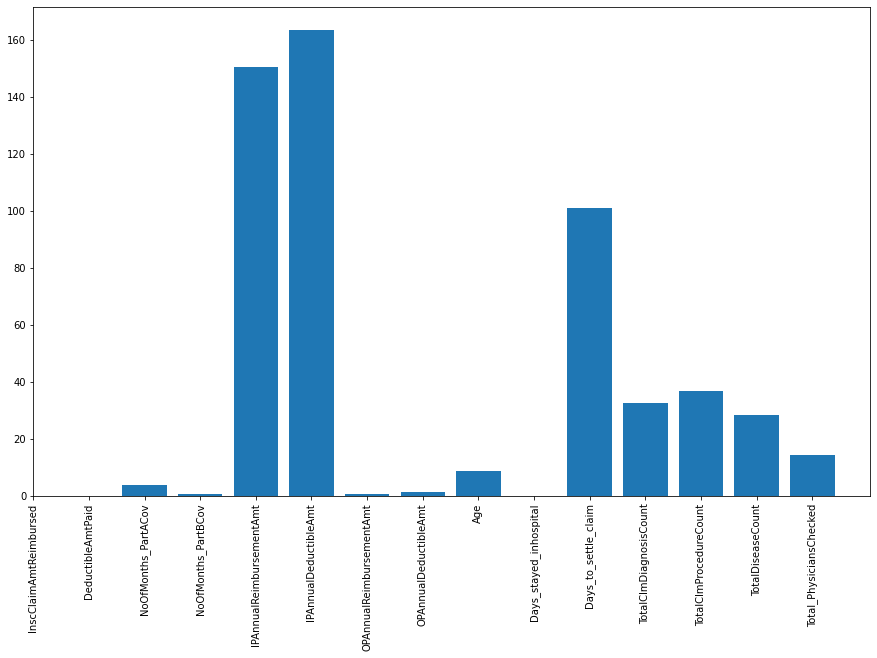

In [ ]:
plt.figure(figsize=(15,9))
# Perform feature selection
selector = SelectKBest(f_classif, k=10)
selector.fit(final_data[c], final_data["PotentialFraud"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(c)), scores)
plt.xticks(range(len(c)), c, rotation='vertical')
plt.show()

In [ ]:
c= final_df_cat.drop(['PotentialFraud','ClaimID'],1).columns
c

Index(['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'Gender', 'Race', 'State', 'County',
       'Patient_visitType', 'DeadorNot', 'Repeted_Physician'],
      dtype='object')

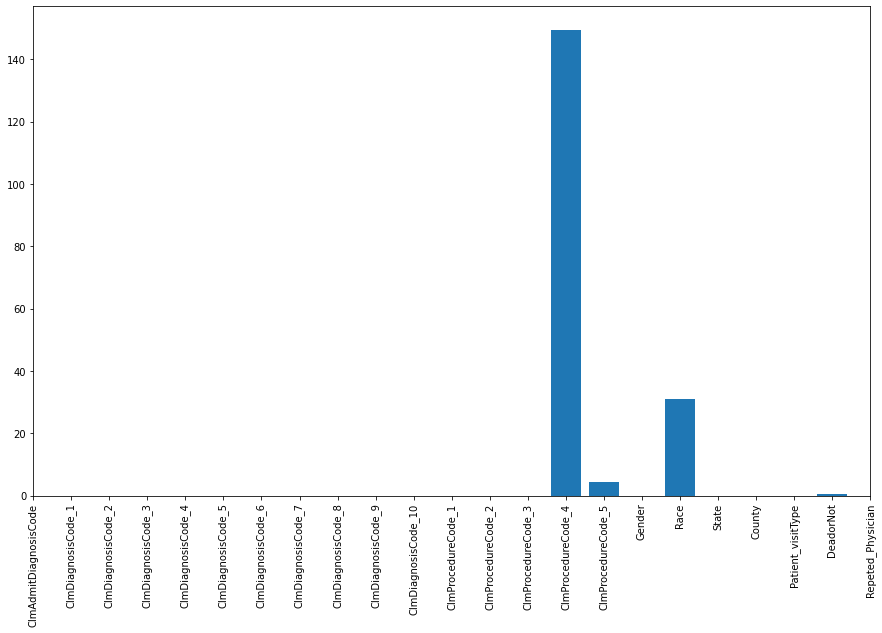

In [ ]:

plt.figure(figsize=(15,9))
# Perform feature selection
selector = SelectKBest(chi2, k=7)
selector.fit(final_data[c], final_data["PotentialFraud"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(c)), scores)
plt.xticks(range(len(c)), c, rotation='vertical')
plt.show()

Finding Importaqnt features from the Feature importance in the RF Model

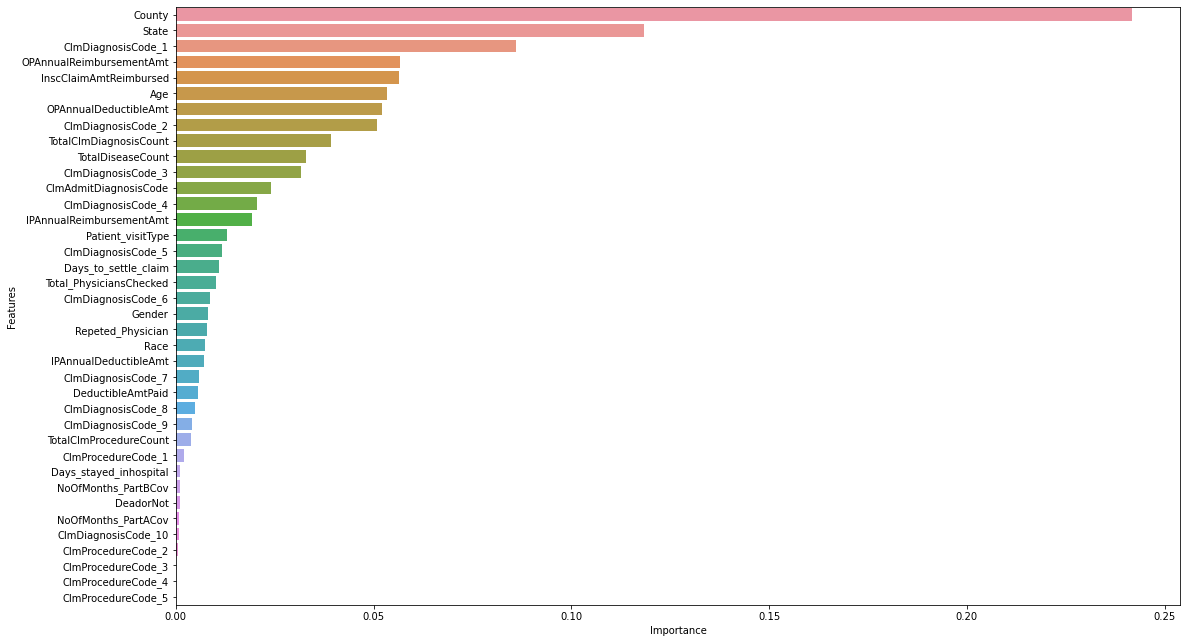

In [ ]:
plt.figure(figsize=(18,11))
feature_imp = pd.DataFrame({'Features':xtrain.columns,
             'Importance':dt.feature_importances_}).sort_values('Importance',ascending=False)
sns.barplot(x= 'Importance', y= 'Features',data= feature_imp)
plt.show()

In [ ]:
feature_imp['Features'].head(15)

21                      County
20                       State
3           ClmDiagnosisCode_1
26    OPAnnualReimbursementAmt
0       InscClaimAmtReimbursed
28                         Age
27       OPAnnualDeductibleAmt
4           ClmDiagnosisCode_2
35      TotalClmDiagnosisCount
37           TotalDiseaseCount
5           ClmDiagnosisCode_3
1        ClmAdmitDiagnosisCode
6           ClmDiagnosisCode_4
24    IPAnnualReimbursementAmt
30           Patient_visitType
Name: Features, dtype: object

In [ ]:
imp_columns = []

for i in feature_imp['Features'].head(15):
  imp_columns.append(i)

print(imp_columns) 

['County', 'State', 'ClmDiagnosisCode_1', 'OPAnnualReimbursementAmt', 'InscClaimAmtReimbursed', 'Age', 'OPAnnualDeductibleAmt', 'ClmDiagnosisCode_2', 'TotalClmDiagnosisCount', 'TotalDiseaseCount', 'ClmDiagnosisCode_3', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_4', 'IPAnnualReimbursementAmt', 'Patient_visitType']


## Choose Important Features

In [ ]:
imp_df = final_data.drop(['Patient_visitType','TotalClmProcedureCount','DeadorNot','NoOfMonths_PartACov','NoOfMonths_PartBCov'],axis=1)

In [ ]:
imp_df.shape

(558211, 19)

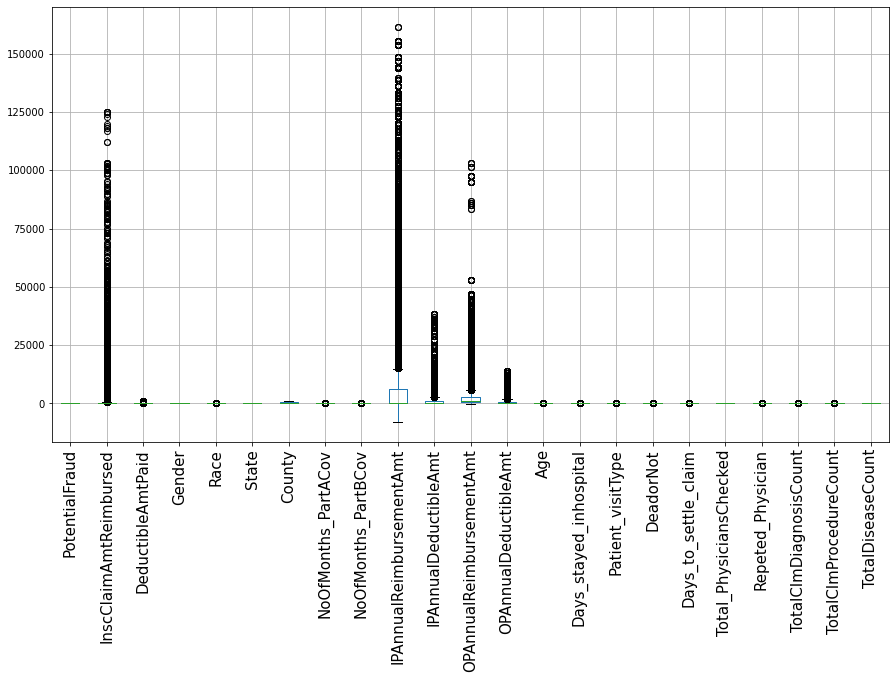

In [ ]:
plt.figure(figsize = (15,8))
final_data.boxplot()

plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [ ]:
final_data.drop(['ClaimID','PotentialFraud'],axis=1)

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim,Total_PhysiciansChecked,Repeted_Physician,TotalClmDiagnosisCount,TotalClmProcedureCount,TotalDiseaseCount
0,500,0.0,1,1,1,410,12,12,2020,1068,6700,2700,74.0,0.0,0.0,0.0,1,2,0.0,1,0,8
1,36000,1068.0,1,1,1,510,12,12,36000,1068,3520,140,69.0,4.0,1.0,0.0,4,1,0.0,3,0,6
2,12000,1068.0,1,1,1,160,12,12,95000,2136,2270,900,72.0,2.0,1.0,0.0,2,1,0.0,1,0,1
3,70,0.0,1,1,1,510,12,12,5000,1068,370,70,91.0,0.0,0.0,0.0,0,1,0.0,4,0,4
4,3000,1068.0,2,1,1,510,12,12,3000,1068,0,0,75.0,5.0,1.0,0.0,5,1,0.0,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,300,0.0,1,1,21,210,12,12,0,0,860,1010,63.0,0.0,0.0,0.0,0,1,0.0,6,0,1
558207,1100,40.0,2,2,21,210,12,12,0,0,1780,320,70.0,0.0,0.0,0.0,9,3,1.0,10,0,6
558208,200,0.0,1,2,21,210,12,12,0,0,200,200,51.0,0.0,0.0,0.0,0,1,0.0,1,0,0
558209,3300,0.0,2,2,21,210,12,12,0,0,3700,240,58.0,0.0,0.0,0.0,0,2,1.0,2,0,2


In [ ]:
# fig,ax = plt.subplots(nrows=2,ncols=4, figsize=(30,12))
# for i,v in zip(final_df_cat.drop(['ClaimID','PotentialFraud'],axis=1).columns, ax.flatten()):
#   sns.countplot(final_df_cat[i], ax= v)

# plt.tight_layout()
# plt.show()

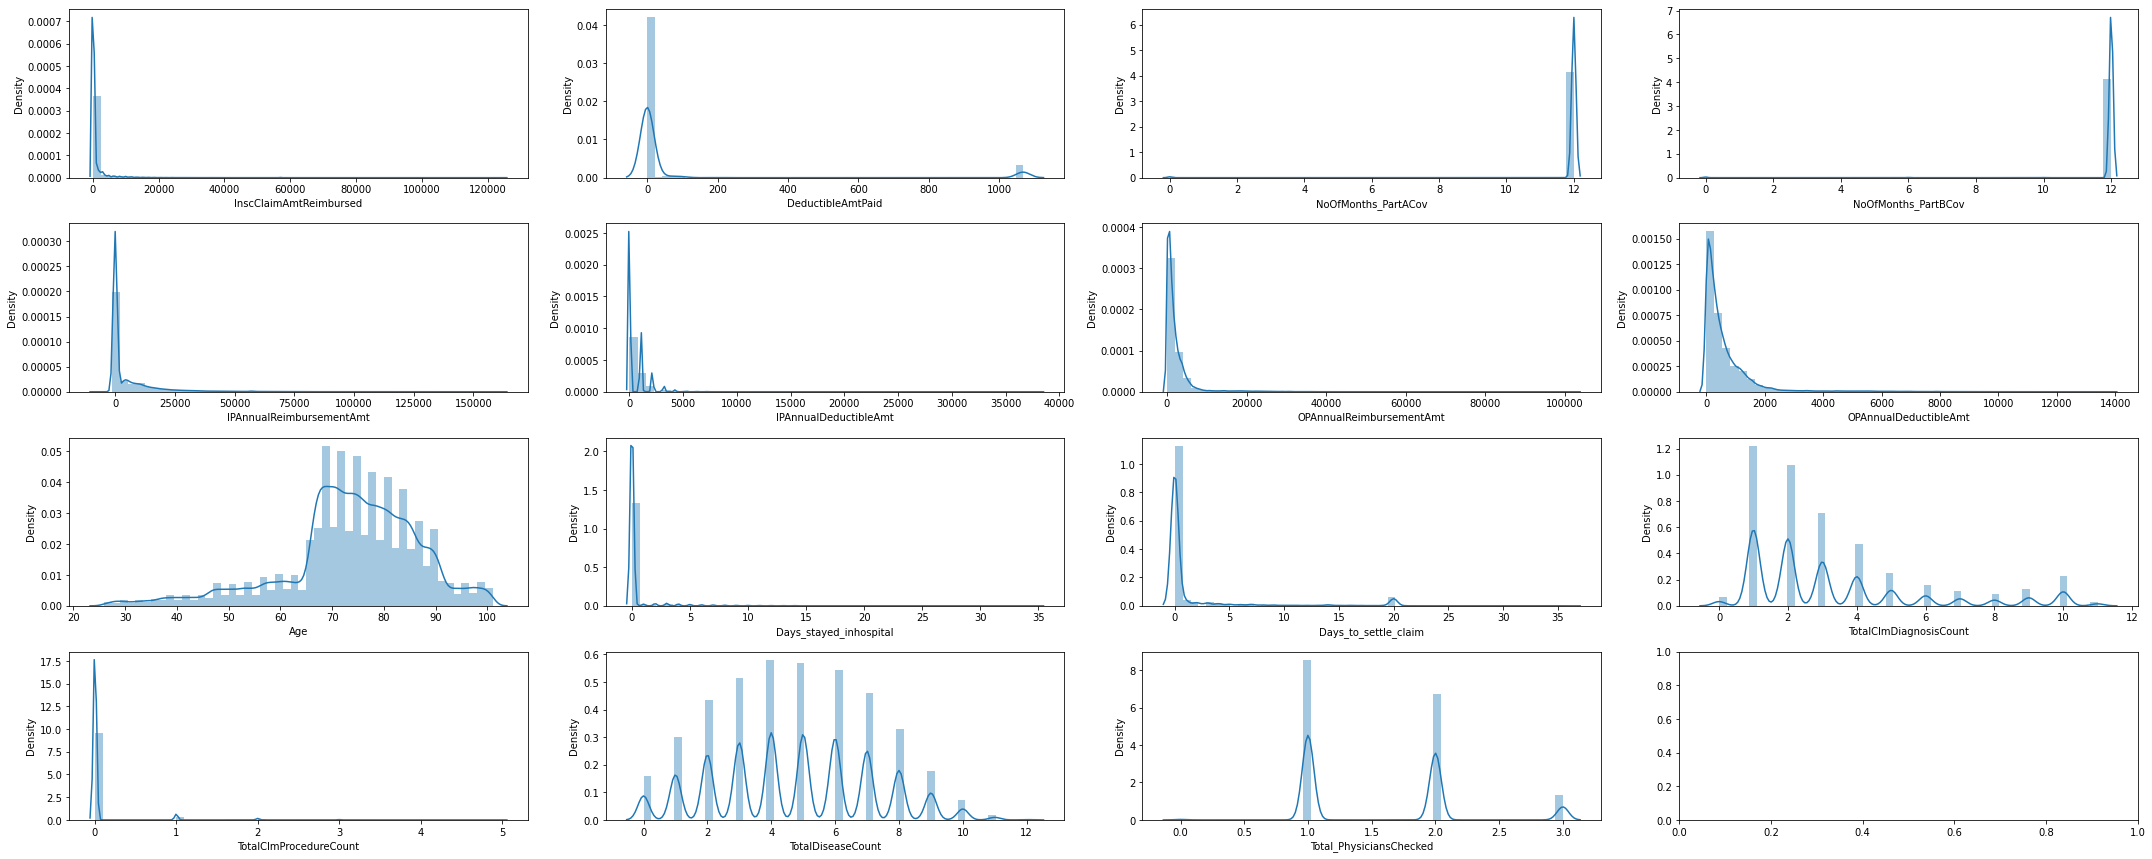

In [ ]:
# fig,ax = plt.subplots(nrows=4,ncols=4, figsize=(30,12))
# for i,v in zip(final_df_num.columns, ax.flatten()):
#   sns.distplot(final_df_num[i], ax= v)

# plt.tight_layout()
# plt.show()

In [ ]:
# plt.figure(figsize=(30,12))
# sns.pairplot(final_data, vars = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'NoOfMonths_PartACov','NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt', 'Age', 'Days_stayed_inhospital','Days_to_settle_claim', 'TotalClmDiagnosisCount','TotalClmProcedureCount', 'TotalDiseaseCount'],hue='PotentialFraud',palette='Set2')

# plt.tight_layout()
# plt.show()

# Scaling

In [ ]:
xtrain.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim,Total_PhysiciansChecked,Repeted_Physician,TotalClmDiagnosisCount,TotalClmProcedureCount,TotalDiseaseCount
262526,50,0.0,2,1,23,150,12,12,0,0,2450,1170,82.0,0.0,0.0,0.0,0,2,1.0,1,0,3
240006,50,0.0,2,1,22,130,12,12,0,0,100,0,75.0,0.0,0.0,0.0,0,1,0.0,3,0,2
432084,6000,1068.0,1,1,39,350,12,12,6100,1068,1720,370,85.0,1.0,1.0,0.0,1,2,1.0,3,0,2
501719,10,0.0,2,5,45,883,12,12,0,0,3010,380,38.0,0.0,0.0,0.0,0,1,0.0,4,0,0
411990,30,0.0,1,1,38,20,12,12,4600,1098,660,540,83.0,0.0,0.0,0.0,0,1,0.0,3,0,4


In [ ]:
xtrain.shape

(446568, 22)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_xtrain = ss.fit_transform(xtrain)

In [ ]:
scaled_xtrain = pd.DataFrame(scaled_xtrain, columns= xtrain.columns)

In [ ]:
scaled_xtrain.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim,Total_PhysiciansChecked,Repeted_Physician,TotalClmDiagnosisCount,TotalClmProcedureCount,TotalDiseaseCount
0,-0.247619,-0.286078,0.852186,-0.355039,-0.160931,-0.862093,0.076684,0.077759,-0.443800,-0.482881,0.043722,0.518195,0.631663,-0.194658,-0.279676,-0.086375,-0.352526,0.688268,1.762415,-0.870783,-0.190125,-0.682269
1,-0.247619,-0.286078,0.852186,-0.355039,-0.226760,-0.937497,0.076684,0.077759,-0.443800,-0.482881,-0.560422,-0.647454,0.093835,-0.194658,-0.279676,-0.086375,-0.352526,-0.876216,-0.567403,-0.104343,-0.190125,-1.084888
2,1.302523,3.612886,-1.173453,-0.355039,0.892327,-0.108048,0.076684,0.077759,0.074801,0.425002,-0.143948,-0.278830,0.862160,0.278763,3.575565,-0.086375,-0.148690,0.688268,1.762415,-0.104343,-0.190125,-1.084888
3,-0.258040,-0.286078,0.852186,5.230478,1.287299,1.901480,0.076684,0.077759,-0.443800,-0.482881,0.187688,-0.268867,-2.748967,-0.194658,-0.279676,-0.086375,-0.352526,-0.876216,-0.567403,0.278878,-0.190125,-1.890124
4,-0.252829,-0.286078,-1.173453,-0.355039,0.826499,-1.352222,0.076684,0.077759,-0.052724,0.450504,-0.416456,-0.109462,0.708495,-0.194658,-0.279676,-0.086375,-0.352526,-0.876216,-0.567403,-0.104343,-0.190125,-0.279651


In [ ]:
scaled_xtrain.shape

(446568, 22)

In [ ]:
scaled_xtest= ss.transform(xtest)

In [ ]:
scaled_xtest = pd.DataFrame(scaled_xtest, columns= xtest.columns)

In [ ]:
scaled_xtest.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Days_stayed_inhospital,Patient_visitType,DeadorNot,Days_to_settle_claim,Total_PhysiciansChecked,Repeted_Physician,TotalClmDiagnosisCount,TotalClmProcedureCount,TotalDiseaseCount
0,12.244702,3.612886,-1.173453,-0.355039,0.036555,2.116383,0.076684,0.077759,3.960057,0.425002,2.575986,2.421093,0.401165,16.375073,3.575565,-0.086375,6.781723,2.252751,-0.567403,-0.104343,-0.190125,0.122967
1,-0.234592,-0.286078,0.852186,5.230478,-1.345847,-0.258857,0.076684,0.077759,-0.443800,-0.482881,0.030868,0.737377,-2.057474,-0.194658,-0.279676,-0.086375,-0.352526,-0.876216,-0.567403,-0.487563,-0.190125,0.122967
2,-0.182487,-0.286078,-1.173453,-0.355039,-0.687560,0.947614,0.076684,0.077759,-0.443800,-0.482881,-0.485868,-0.587677,0.862160,-0.194658,-0.279676,-0.086375,1.889667,-0.876216,-0.567403,0.278878,-0.190125,-0.682269
3,-0.234592,-0.286078,-1.173453,-0.355039,0.892327,0.495187,0.076684,0.077759,-0.443800,-0.482881,-0.534714,-0.607603,0.401165,-0.194658,-0.279676,-0.086375,-0.352526,0.688268,-0.567403,2.578200,3.379213,-1.890124
4,-0.237198,-0.286078,-1.173453,1.041340,0.365698,-0.824391,0.076684,0.077759,-0.443800,-0.482881,-0.557851,-0.298756,-3.670957,-0.194658,-0.279676,-0.086375,-0.352526,0.688268,-0.567403,-0.487563,-0.190125,-1.084888


In [ ]:
scaled_xtest.shape

(111643, 22)

In [ ]:
rf_sacled = RandomForestClassifier(random_state=10)
rf_sacled.fit(scaled_xtrain,ytrain)

y_pred_rf_scaled = rf_sacled.predict(scaled_xtest)
y_pred_train_scaled = rf_sacled.predict(scaled_xtrain)

print ('Train Accuracy: ',accuracy_score(ytrain,y_pred_train_scaled))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf_scaled), '\n')

print(roc_auc_score(ytest,y_pred_rf_scaled))
print(cohen_kappa_score(ytest,y_pred_rf_scaled),'\n')

print(classification_report(ytest,y_pred_rf_scaled))

Train Accuracy:  0.9981033123734795
Test Accuracy:  0.7321641303082146 

0.6962426164701524
0.40891516322620924 

              precision    recall  f1-score   support

           0       0.75      0.85      0.80     69009
           1       0.69      0.54      0.61     42634

    accuracy                           0.73    111643
   macro avg       0.72      0.70      0.70    111643
weighted avg       0.73      0.73      0.72    111643



In [ ]:
cm = confusion_matrix(ytest,y_pred_rf_scaled)
cm

array([[58540, 10469],
       [19433, 23201]])

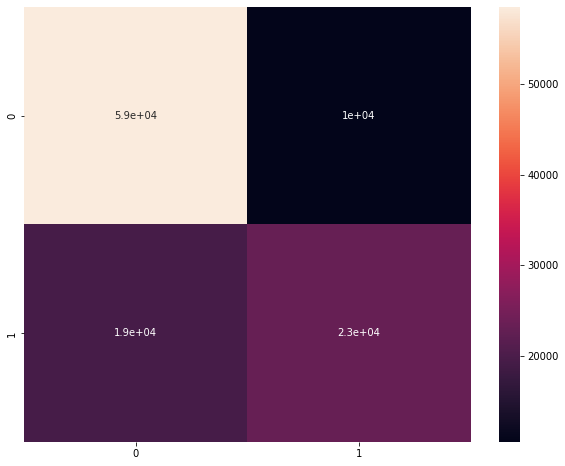

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
x = final_data.drop(['ClaimID','PotentialFraud'],axis=1)
y = final_data['PotentialFraud']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=10 )

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

scaled_xtrain = mm.fit_transform(xtrain)

In [ ]:
scaled_xtrain = pd.DataFrame(scaled_xtrain, columns= xtrain.columns)
scaled_xtest= mm.transform(xtest)
scaled_xtest = pd.DataFrame(scaled_xtest, columns= xtest.columns)

In [ ]:
rf_sacled = RandomForestClassifier(random_state=100)
rf_sacled.fit(scaled_xtrain,ytrain)

y_pred_rf_scaled = rf_sacled.predict(scaled_xtest)
y_pred_train_scaled = rf_sacled.predict(scaled_xtrain)

print ('Train Accuracy: ',accuracy_score(ytrain,y_pred_train_scaled))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf_scaled), '\n')

print(roc_auc_score(ytest,y_pred_rf_scaled))
print(cohen_kappa_score(ytest,y_pred_rf_scaled))
print(classification_report(ytest,y_pred_rf_scaled))

Train Accuracy:  0.99807644076602
Test Accuracy:  0.7344571536056895 

0.6984592569499363
0.4132450325457572
              precision    recall  f1-score   support

           0       0.75      0.85      0.80     69224
           1       0.69      0.55      0.61     42419

    accuracy                           0.73    111643
   macro avg       0.72      0.70      0.70    111643
weighted avg       0.73      0.73      0.73    111643



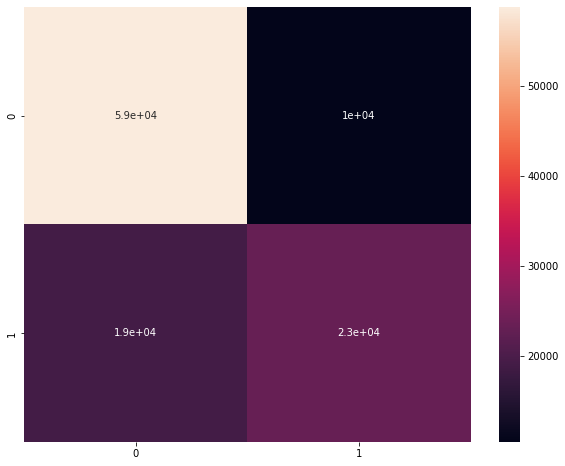

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(ytest,y_pred_rf_scaled),annot=True)
plt.show()

## Naive base Model

In [ ]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)

y_pred_gnb = gnb.predict(xtest)
y_train_gnb = gnb.predict(xtrain)

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_gnb))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_gnb), '\n\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,y_pred_gnb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_gnb),'\n\n')

print(classification_report(ytest,y_pred_gnb))

Train Accuracy:  0.6251970584547034
Test Accuracy:  0.627177700348432 


ROC-AUC Score:  0.5329203859404436
Cohen Cappa Score:  0.07681824188531161 


              precision    recall  f1-score   support

           0       0.64      0.93      0.75     69224
           1       0.54      0.14      0.22     42419

    accuracy                           0.63    111643
   macro avg       0.59      0.53      0.49    111643
weighted avg       0.60      0.63      0.55    111643



In [ ]:
cm = confusion_matrix(ytest,y_pred_gnb)
cm 

array([[64067,  5157],
       [36466,  5953]])